<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/028_dnn_search_t_1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.06.12 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with DNN (Variables: + Search Volume) - Results (2018-2022)**

|Search Volume     |Variables     |
|------------------|--------------|
|t-1|t_sv          |

<br>

### Contents

##### 1. Input Data
*  月營收盈餘 (2013-2022)
*  網路聲量 (2013-2022)：t-1 (*new)

##### 5. Model Training
*  預先訓練多個模型並儲存
*  Training History

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  DNN
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Read Saved Results (*new)
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%

##### 9. Best and Worst Model
*  DNN 預測最好和最差的模型組合
*  所有模型組合中，預測最好和最差的模型組合


## **0. Setup**

In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.6 MB/s eta 0:00:00


In [ ]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/MyDrive/論文/code/Function


In [ ]:
from MonRevForecast import predictMonthlyRevenueNN, BestWorstSingleModel, trainMonthlyRevenueNN

importing Jupyter notebook from MonRevForecast.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.4 MB/s eta 0:00:00


In [ ]:
from MonRevPlot import plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [ ]:
from MonRevPlot import plotModelScore, modelScoreBoxplotV

In [ ]:
from MonRevForecast import plotTrainingHistory

### **Project Path**

In [ ]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

### **1.1 月營收盈餘 (2013-2022)**

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站

In [ ]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,9134465,5540346,9457971,9919269,9543782,9517630,9875888,9835143,10060975,10654077,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6018213,2552357,5428755,5930748,6239676,5952754,5942364,5786107,5879394,6478670,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,288455,166638,286007,365292,382601,302995,294781,336088,314563,429783,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,486481,299860,461732,394631,406677,415968,453397,393203,448691,521445,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,481802,276936,444917,362054,381384,368109,439572,379115,387362,450770,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,201785,167967,240746,243935,238296,193880,198427,256724,228796,250756,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,394489,383183,428478,564053,336622,295391,434605,306534,266617,363766,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,198944,166364,351222,280864,289332,426371,213281,302589,401695,255738,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [ ]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


### **1.2 網路聲量 (2013-2022)：t-1**

In [ ]:
search_volume_data = pd.read_csv(os.path.join(project_path, '資料集/search volume/search_volume_t-1.csv'), index_col = 0)
search_volume_data.columns = pd.to_datetime(search_volume_data.columns, format="%Y-%m-%d").to_period('M')
search_volume_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,57.0,66.0,0.0,0.0,0.0,27.0,100.0,0.0,0.0,0.0,...,20.0,53.0,66.0,19.0,58.0,30.0,62.0,57.0,79.0,73.0
1102 亞泥,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.0,52.0,78.0,74.0,70.0,50.0,81.0,49.0,0.0,100.0
1103 嘉泥,0.0,58.0,0.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,29.0
1104 環泥,0.0,0.0,96.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,...,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0
1108 幸福,83.0,56.0,73.0,80.0,65.0,66.0,92.0,94.0,74.0,75.0,...,82.0,92.0,71.0,67.0,69.0,77.0,84.0,77.0,92.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,0.0,0.0,0.0,0.0,18.0,0.0,52.0,0.0,0.0,0.0,...,0.0,39.0,72.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0
9955 佳龍,43.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,...,32.0,100.0,35.0,0.0,36.0,43.0,37.0,71.0,0.0,0.0
9958 世紀鋼,100.0,0.0,64.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,...,38.0,0.0,35.0,32.0,0.0,48.0,60.0,23.0,100.0,0.0
9960 邁達康,100.0,0.0,78.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,...,21.0,0.0,0.0,0.0,100.0,0.0,49.0,47.0,35.0,27.0


In [ ]:
print("Data shape:", search_volume_data.shape)
print("Data size:", search_volume_data.size)

Data shape: (1240, 120)
Data size: 148800


## **5. Model Training**

### **5.2.3 預先訓練多個模型並儲存**


In [ ]:
model_save_path_dnn = os.path.join(project_path, 'model/search_volume/t-1/dnn')

In [ ]:
test_y_1 = 2018
test_y_2 = 2019
test_y_3 = 2020
test_y_4 = 2021
test_y_5 = 2022
start_m_1 = 1
end_m_1 = 6
start_m_2 = 7
end_m_2 = 12

#### **DNN**

2018 (4.6 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2018-01 model saved. Using time: 861.590  secs.
2018-02 model saved. Using time: 910.877  secs.
2018-03 model saved. Using time: 924.536  secs.
2018-04 model saved. Using time: 1001.447  secs.
2018-05 model saved. Using time: 911.632  secs.
2018-06 model saved. Using time: 1006.798  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_2, test_y_1, end_m_2, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2018-07 model saved. Using time: 1659.789  secs.
2018-08 model saved. Using time: 1656.509  secs.
2018-09 model saved. Using time: 1686.946  secs.
2018-10 model saved. Using time: 1656.474  secs.
2018-11 model saved. Using time: 1774.557  secs.
2018-12 model saved. Using time: 1721.241  secs.


2019 (5.6 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2019-01 model saved. Using time: 1397.818  secs.
2019-02 model saved. Using time: 1436.715  secs.
2019-03 model saved. Using time: 1453.866  secs.
2019-04 model saved. Using time: 1403.195  secs.
2019-05 model saved. Using time: 1410.106  secs.
2019-06 model saved. Using time: 1503.702  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_2, test_y_2, end_m_2, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2019-07 model saved. Using time: 1010.868  secs.
2019-08 model saved. Using time: 1012.961  secs.
2019-09 model saved. Using time: 1075.433  secs.
2019-10 model saved. Using time: 1051.361  secs.
2019-11 model saved. Using time: 1061.556  secs.
2019-12 model saved. Using time: 1032.547  secs.


2020 (4 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2020-01 model saved. Using time: 1028.283  secs.
2020-02 model saved. Using time: 965.595  secs.
2020-03 model saved. Using time: 1023.424  secs.
2020-04 model saved. Using time: 872.292  secs.
2020-05 model saved. Using time: 962.947  secs.
2020-06 model saved. Using time: 1022.247  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_2, test_y_3, end_m_2, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2020-07 model saved. Using time: 1635.151  secs.
2020-08 model saved. Using time: 1716.976  secs.
2020-09 model saved. Using time: 1628.899  secs.
2020-10 model saved. Using time: 1663.972  secs.
2020-11 model saved. Using time: 1697.582  secs.
2020-12 model saved. Using time: 1682.962  secs.


2021 (3.4 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2021-01 model saved. Using time: 1570.939  secs.
2021-02 model saved. Using time: 1682.514  secs.
2021-03 model saved. Using time: 1649.654  secs.
2021-04 model saved. Using time: 1729.110  secs.
2021-05 model saved. Using time: 1629.162  secs.
2021-06 model saved. Using time: 1612.777  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_2, test_y_4, end_m_2, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2021-07 model saved. Using time: 1697.723  secs.
2021-08 model saved. Using time: 1697.112  secs.
2021-09 model saved. Using time: 1697.096  secs.
2021-10 model saved. Using time: 1606.866  secs.
2021-11 model saved. Using time: 1658.222  secs.
2021-12 model saved. Using time: 1741.875  secs.


2022 (3.8 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2022-01 model saved. Using time: 1687.648  secs.
2022-02 model saved. Using time: 1603.109  secs.
2022-03 model saved. Using time: 1719.383  secs.
2022-04 model saved. Using time: 1702.544  secs.
2022-05 model saved. Using time: 1636.591  secs.
2022-06 model saved. Using time: 1516.767  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_2, test_y_5, end_m_2, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

2022-07 model saved. Using time: 1281.954  secs.
2022-08 model saved. Using time: 1317.492  secs.
2022-09 model saved. Using time: 1331.887  secs.
2022-10 model saved. Using time: 1335.997  secs.
2022-11 model saved. Using time: 1302.947  secs.
2022-12 model saved. Using time: 1354.394  secs.


### **5.2.4 Training History**

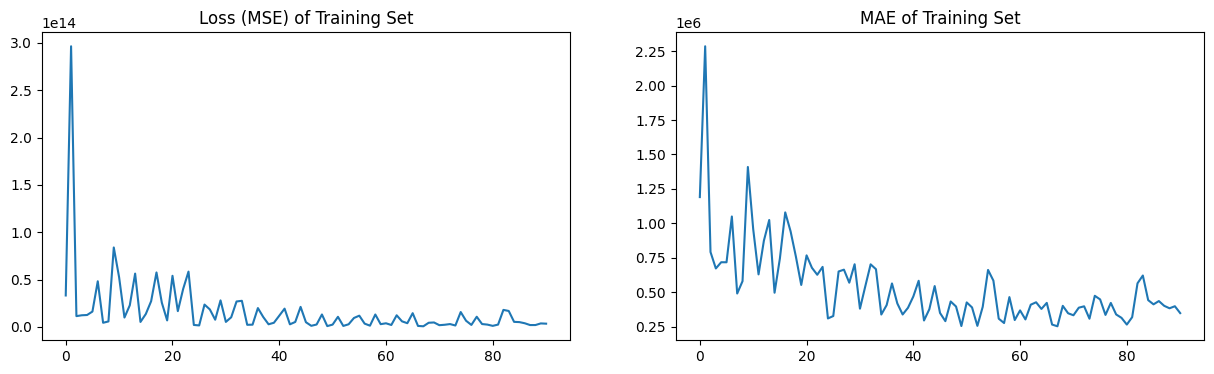

In [ ]:
model_save_path_dnn = os.path.join(project_path, 'model/search_volume/t-1/dnn')
plotTrainingHistory(model_save_path_dnn, '2022-12', 'model')

## **7. Predicting Results**

y_train = y_test 往前 12 個月

<br>

||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2013-01 - 2016-12|2017-01|2014-01 - 2017-12|**2018-01**|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|**2022-12**|


In [ ]:
file_category = 'search_volume'
search_volume_type = 't-1'

# 預測年月
start_y = 2018
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [ ]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [ ]:
# Output
def outputPredictingResults(category: str, modelName: str, pred: dict, searchType: str):
    pred['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_pred_{modelName}_{category}_{searchType}.xlsx'))

def outputScores(category: str, modelName: str, scoresD: pd.DataFrame, searchType: str):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/{searchType}/scores_{modelName}_{category}_{searchType}.xlsx'))

### **7.2 DNN**

In [ ]:
# Load trained model
model_save_path_dnn = os.path.join(project_path, f'model/{file_category}/{search_volume_type}/dnn')

In [ ]:
# dnn (6 min.)
pred_dnn, scores_dnn = predictMonthlyRevenueNN(org_data, start_y, start_m, end_y, end_m, 'dnn', model_save_path_dnn, search_volume_data = search_volume_data)

Using time: 339.392  secs.


In [ ]:
# Output
outputPredictingResults(file_category, 'dnn', pred_dnn, search_volume_type)
outputScores(file_category, 'dnn', scores_dnn, search_volume_type)

#### **7.2.1 Predicting Results**

In [ ]:
# Original
print(pred_dnn['org']['org'].shape)
print(pred_dnn['org']['dec'].shape)
print(pred_dnn['org']['season'].shape)
pred_dnn['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,8357794.0,7858262.0,8397919.0,9340190.0,8406231.0,9274466.0,9794937.0,9516530.0,10593904.0,9739058.0,...,9604982.0,9059814.0,8493644.0,8346766.0,8707126.0,8433797.0,10367284.0,10265549.0,11196483.0,13197384.0
1102 亞泥,5654820.0,5052828.0,5632097.0,6352428.0,5416968.0,5692436.0,6587180.0,6469745.0,7377332.0,6868581.0,...,8605343.0,7356420.0,8127898.0,8142960.0,8356932.0,7560210.0,8635719.0,7757790.0,8582272.0,9706232.0
1103 嘉泥,235141.0,181580.0,165618.0,207220.0,151948.0,171805.0,174660.0,149359.0,217053.0,178314.0,...,199899.0,172891.0,182189.0,190709.0,146864.0,180007.0,198323.0,200941.0,210562.0,137648.0
1104 環泥,392020.0,295133.0,385459.0,408786.0,395501.0,357290.0,384922.0,362098.0,376148.0,386811.0,...,629828.0,519695.0,540609.0,620480.0,592883.0,592730.0,670404.0,612963.0,422392.0,781112.0


In [ ]:
# Deflating
print(pred_dnn['def']['org'].shape)
print(pred_dnn['def']['dec'].shape)
print(pred_dnn['def']['season'].shape)
pred_dnn['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,8081829.0,7634625.0,8800644.0,9211808.0,9648682.0,11286729.0,10082462.0,11364313.0,10572549.0,8859391.0,...,9429228.0,9448667.0,7798056.0,9420132.0,10151873.0,9535501.0,10435485.0,11726168.0,11463939.0,12092217.0
1102 亞泥,5069077.0,4947628.0,6058491.0,5850715.0,5821114.0,6869851.0,7015762.0,7677011.0,7060585.0,6221329.0,...,8096531.0,7590405.0,7514953.0,8332337.0,9620834.0,7574006.0,7322682.0,8529098.0,8202299.0,9785595.0
1103 嘉泥,163837.0,138228.0,191719.0,163850.0,179250.0,178886.0,202722.0,179324.0,188103.0,177396.0,...,174529.0,199033.0,177720.0,170099.0,187884.0,178988.0,190881.0,197009.0,218437.0,222808.0
1104 環泥,360676.0,368384.0,389022.0,377087.0,380267.0,423580.0,373065.0,374991.0,372636.0,377620.0,...,523629.0,567908.0,559169.0,548435.0,579942.0,551604.0,597111.0,596405.0,630349.0,667219.0


### **7.4 Scores**

In [ ]:
scores_dnn

,RMSE-org,MAE-org,MAE%-org,MAPE-org,RMSE-def,MAE-def,MAE%-def,MAPE-def,RMSE-dec,MAE-dec,...,MAE%-dec_def,MAPE-dec_def,RMSE-season,MAE-season,MAE%-season,MAPE-season,RMSE-season_def,MAE-season_def,MAE%-season_def,MAPE-season_def
2018-01,1520725.0,277778.0,0.1426,0.6860,1832719.0,252347.0,0.1296,0.6336,1657104.0,312317.0,...,0.1584,7.6927,1668481.0,391252.0,0.2009,1.0520,1347060.0,237372.0,0.1219,0.2994
2018-02,1951540.0,282270.0,0.1894,0.8525,1302461.0,226389.0,0.1519,0.3245,1909583.0,291903.0,...,0.1752,0.4563,1985564.0,296425.0,0.1989,1.0993,2128505.0,309017.0,0.2074,0.4418
2018-03,1456112.0,225804.0,0.1203,0.2584,2176893.0,232822.0,0.1240,0.2508,1155328.0,266355.0,...,0.1222,0.2753,1797364.0,273647.0,0.1458,0.3103,2678867.0,288791.0,0.1538,0.3363
2018-04,1171562.0,266178.0,0.1484,1.3574,1657139.0,222853.0,0.1243,0.2461,1029896.0,249476.0,...,0.1828,0.2973,963871.0,274744.0,0.1532,1.2576,2216708.0,280961.0,0.1566,0.4510
2018-05,1214729.0,211099.0,0.1115,0.2704,1334279.0,236650.0,0.1250,0.2150,1081467.0,204014.0,...,0.0786,0.2105,1559472.0,367423.0,0.1940,0.4640,1721016.0,229707.0,0.1213,0.3201
2018-06,1624359.0,238134.0,0.1244,0.2471,976834.0,163222.0,0.0852,0.2439,1189234.0,223969.0,...,0.0860,0.2908,1655387.0,274838.0,0.1435,0.4920,1538961.0,227765.0,0.1190,0.3717
2018-07,1454261.0,224485.0,0.1140,0.5431,769273.0,140811.0,0.0715,0.4479,832391.0,241867.0,...,0.0748,0.2690,852104.0,236334.0,0.1201,1.3468,726673.0,188586.0,0.0958,0.5706
2018-08,1242677.0,201065.0,0.0977,0.3444,850566.0,181402.0,0.0881,0.3132,1104754.0,198053.0,...,0.0824,0.4795,1081431.0,258236.0,0.1254,0.6307,1320810.0,220178.0,0.1069,0.4582
2018-09,2139519.0,254535.0,0.1140,0.4597,3836221.0,253840.0,0.1137,0.4759,2147017.0,267634.0,...,0.0950,0.9186,3318194.0,347599.0,0.1557,0.5624,3578235.0,268714.0,0.1204,0.4947
2018-10,1548668.0,229862.0,0.1004,0.3014,4975936.0,408532.0,0.1784,0.2215,1857835.0,249277.0,...,0.1011,0.3013,2833418.0,411760.0,0.1798,0.7306,5140735.0,409307.0,0.1787,0.1804


In [ ]:
# Mean scores
scores_dnn.mean()

RMSE-org           2.139933e+06
MAE-org            3.211073e+05
MAE%-org           1.497700e-01
MAPE-org           1.737102e+00
RMSE-def           2.395329e+06
MAE-def            2.694041e+05
MAE%-def           1.251267e-01
MAPE-def           4.304267e-01
RMSE-dec           2.256294e+06
MAE-dec            3.319342e+05
MAE%-dec           1.546283e-01
MAPE-dec           1.600207e+00
RMSE-dec_def       2.030816e+06
MAE-dec_def        2.477817e+05
MAE%-dec_def       1.158450e-01
MAPE-dec_def       5.388700e-01
RMSE-season        2.955342e+06
MAE-season         4.047007e+05
MAE%-season        1.867833e-01
MAPE-season        2.154312e+00
RMSE-season_def    2.980617e+06
MAE-season_def     3.225758e+05
MAE%-season_def    1.514850e-01
MAPE-season_def    7.280917e-01
dtype: float64

## **8. Plots**


### **8.0 Read Saved Results**
2023.06.11

In [ ]:
# # Output data path
# output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'
# file_category = 'search_volume'
# search_volume_type = 't-1'

# # 預測年月
# start_y = 2018
# start_m = 1
# end_y = 2022
# end_m = 12

In [ ]:
# def getPredictingResults(category: str, modelName: str, searchType: str):
#     pred = {'org': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#             },
#             'def': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#             }
#     }
#     return pred

# def getScores(category: str, modelName: str, searchType: str):
#     scoresD = pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/scores_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#     return scoresD

In [ ]:
# pred_dnn = getPredictingResults(file_category, 'dnn', search_volume_type)
# scores_dnn = getScores(file_category, 'dnn', search_volume_type)

### **8.1 Expected v.s. Predicted**

#### **8.1.2 分模型畫圖**

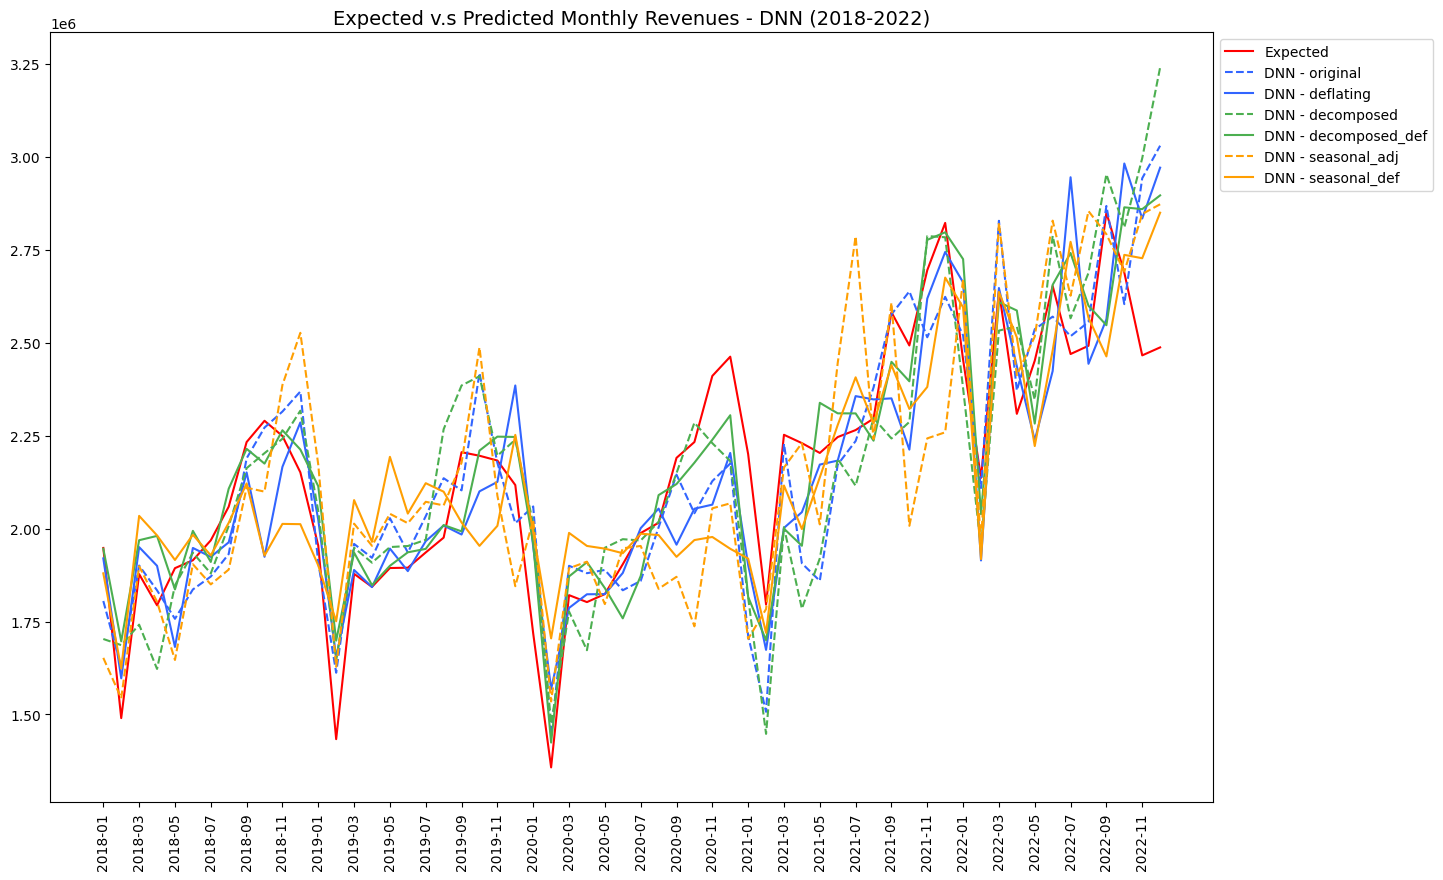

In [ ]:
plotModelExpectedPredictedRevenues(org_data, pred_dnn, 'dnn', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.2 分模型畫圖**

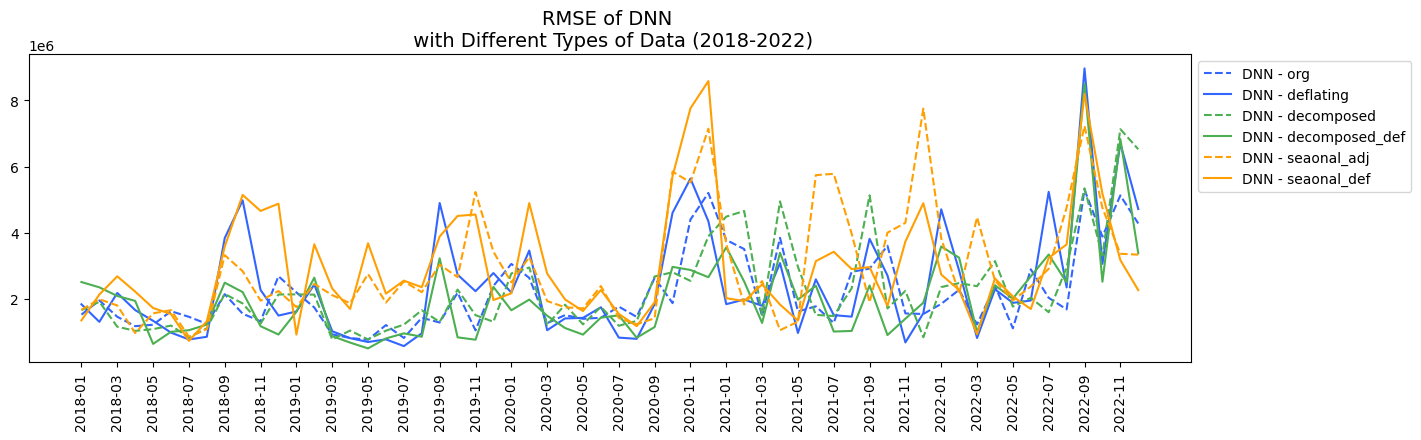

In [ ]:
# RMSE
plotModelScore(scores_dnn, 'DNN', 'RMSE', start_y)

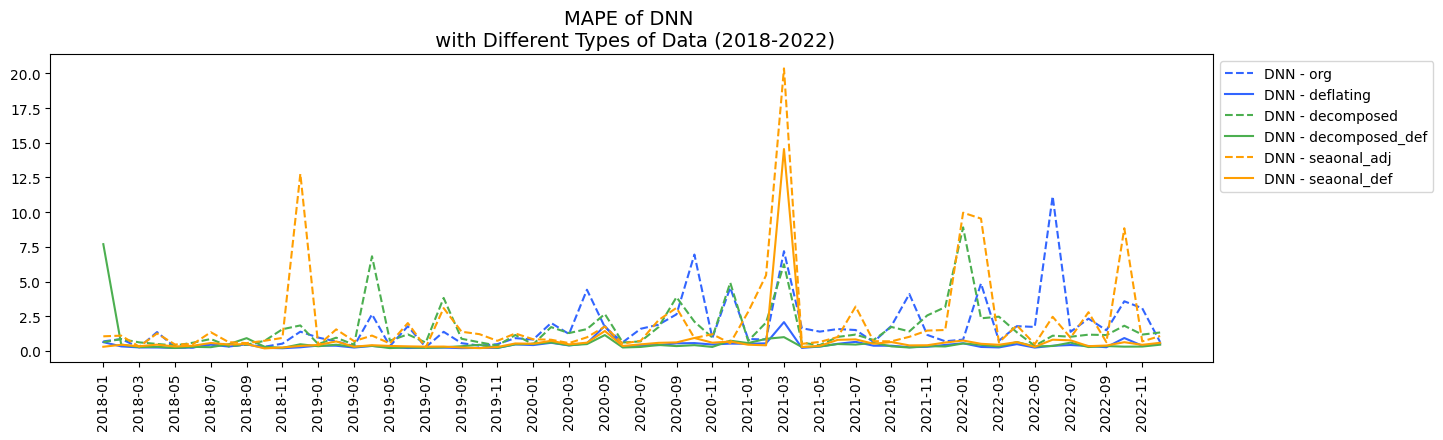

In [ ]:
# MAPE
plotModelScore(scores_dnn, 'DNN', 'MAPE', start_y)

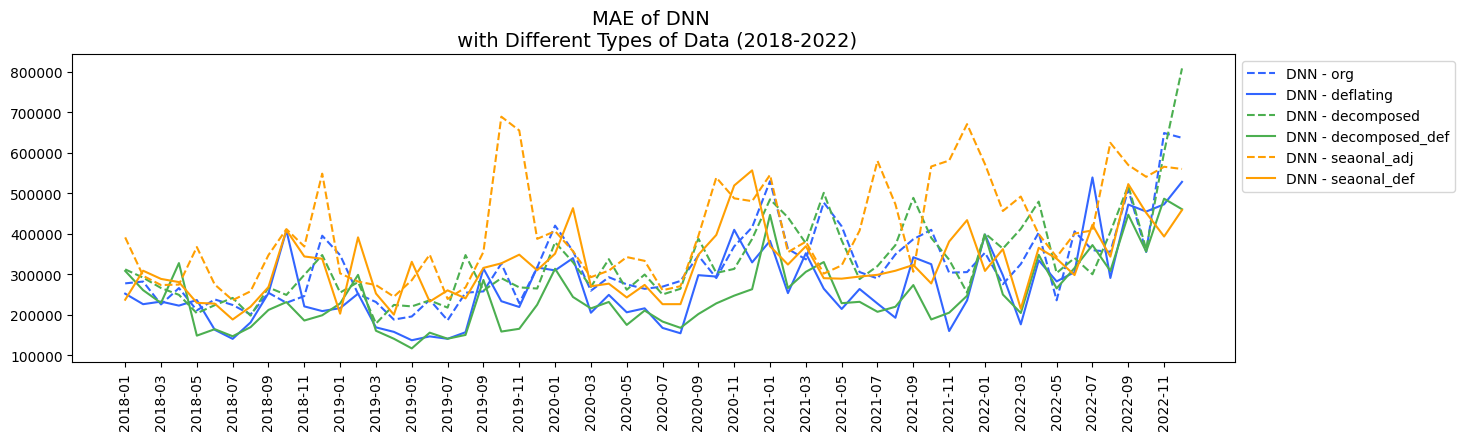

In [ ]:
# MAE
plotModelScore(scores_dnn, 'DNN', 'MAE', start_y)

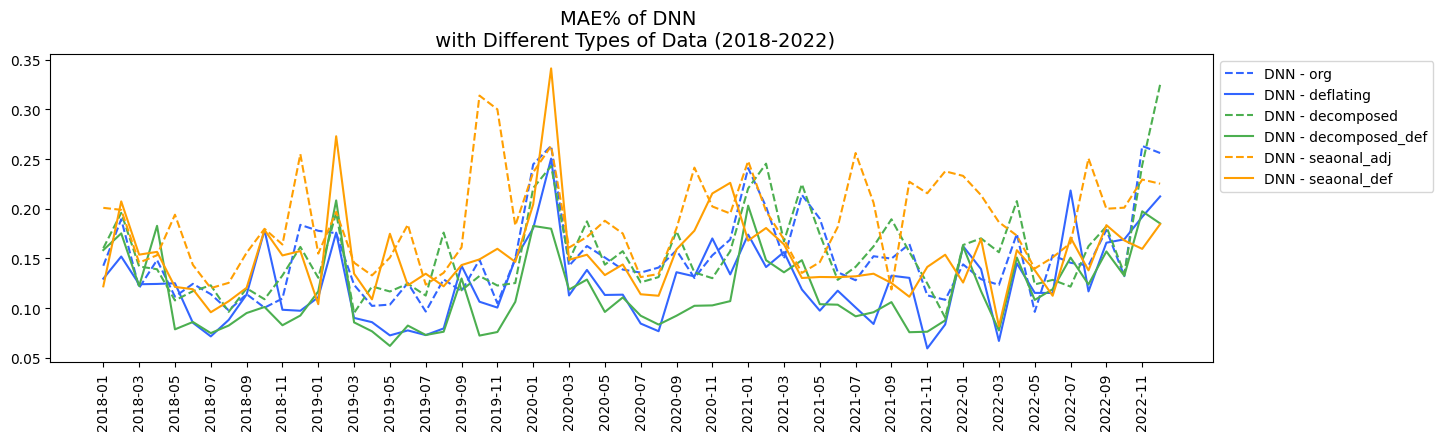

In [ ]:
# MAE%
plotModelScore(scores_dnn, 'DNN', 'MAE%', start_y)

#### **8.2.3 Boxplot**

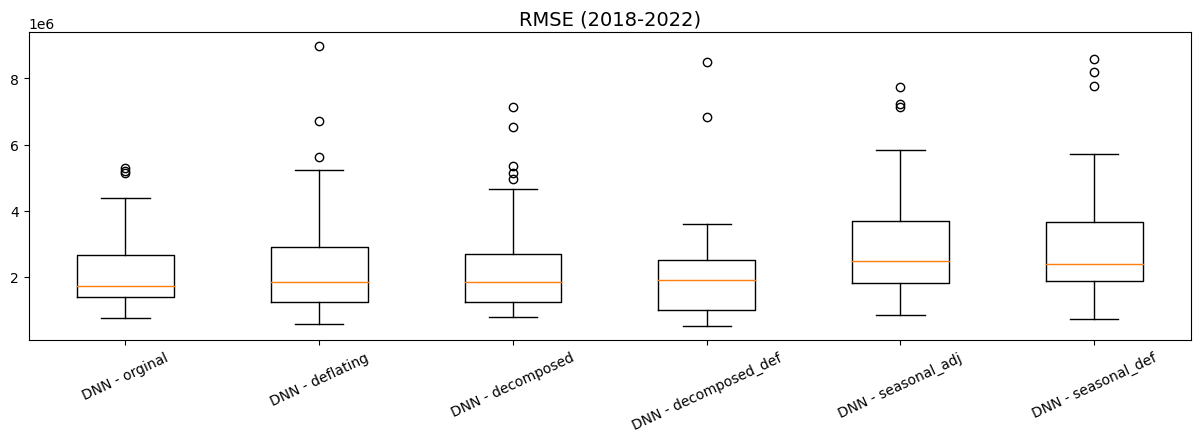

In [ ]:
# RMSE
modelScoreBoxplotV(scores_dnn, 'RMSE', start_y)

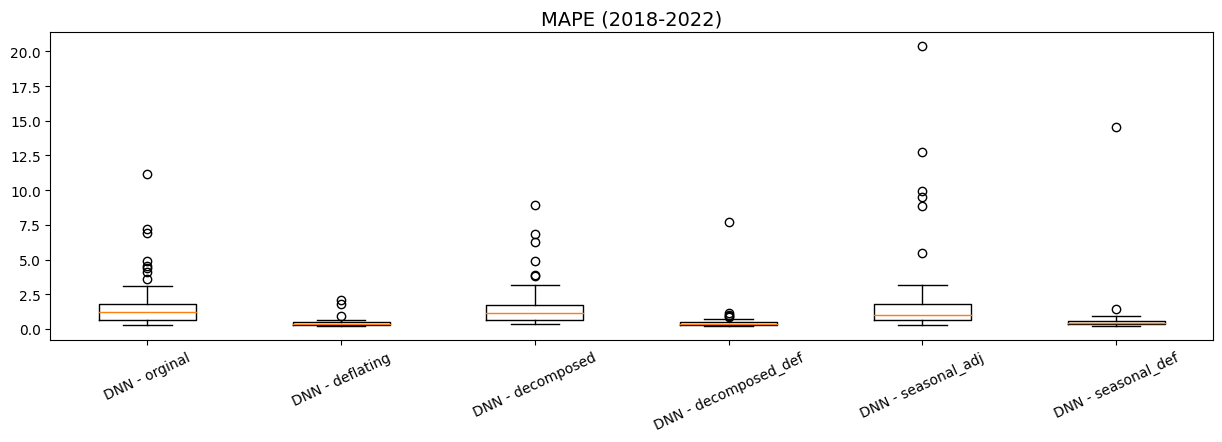

In [ ]:
# MAPE
modelScoreBoxplotV(scores_dnn, 'MAPE', start_y)

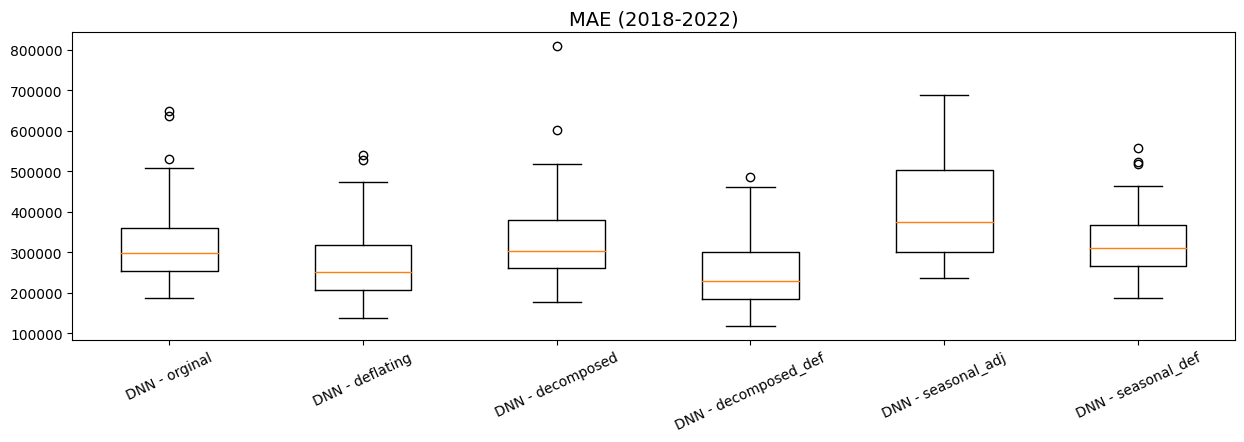

In [ ]:
# MAE
modelScoreBoxplotV(scores_dnn, 'MAE', start_y)

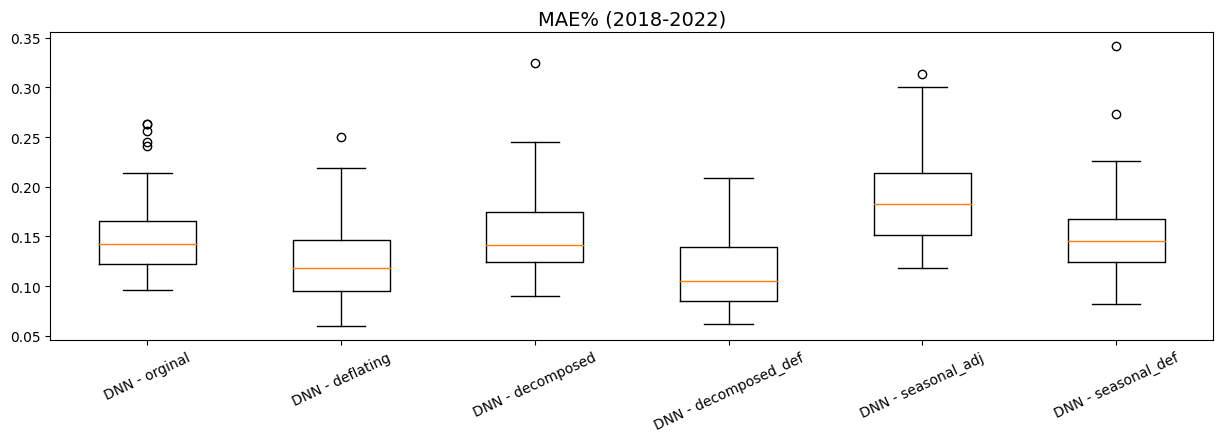

In [ ]:
# MAE%
modelScoreBoxplotV(scores_dnn, 'MAE%', start_y)

## **9. Best and Worst Model**

In [ ]:
bw = BestWorstSingleModel(scores_dnn, 'DNN')

### **9.1 各模型組合中，預測最好和最差的月份**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|6|4|2 (fixed)|1x6x4x2 = 48|

#### **9.1.1 RMSE**

In [ ]:
best_rmse, worst_rmse = bw.findBestWorstForAll('RMSE')

##### **最佳月份**

In [ ]:
best_rmse

,modelName,dataType,scoreType,min_month,min_score
0,DNN,org,RMSE,2019-05,761317.0
4,DNN,def,RMSE,2019-07,568954.0
8,DNN,dec,RMSE,2019-05,769725.0
12,DNN,dec_def,RMSE,2019-05,499181.0
16,DNN,season,RMSE,2018-07,852104.0
20,DNN,season_def,RMSE,2018-07,726673.0


##### **最差月份**

In [ ]:
worst_rmse

,modelName,dataType,scoreType,max_month,max_score
0,DNN,org,RMSE,2022-09,5300129.0
4,DNN,def,RMSE,2022-09,8966637.0
8,DNN,dec,RMSE,2022-11,7128924.0
12,DNN,dec_def,RMSE,2022-09,8501750.0
16,DNN,season,RMSE,2021-12,7750658.0
20,DNN,season_def,RMSE,2020-12,8583513.0


#### **9.1.2 MAPE**

In [ ]:
best_mape, worst_mape = bw.findBestWorstForAll('MAPE')

##### **最佳月份**

In [ ]:
best_mape

,modelName,dataType,scoreType,min_month,min_score
3,DNN,org,MAPE,2018-06,0.2471
7,DNN,def,MAPE,2018-11,0.1931
11,DNN,dec,MAPE,2018-08,0.3338
15,DNN,dec_def,MAPE,2019-05,0.2020
19,DNN,season,MAPE,2019-07,0.2472
23,DNN,season_def,MAPE,2018-10,0.1804


##### **最差月份**

In [ ]:
worst_mape

,modelName,dataType,scoreType,max_month,max_score
3,DNN,org,MAPE,2022-06,11.1457
7,DNN,def,MAPE,2021-03,2.0748
11,DNN,dec,MAPE,2022-01,8.9061
15,DNN,dec_def,MAPE,2018-01,7.6927
19,DNN,season,MAPE,2021-03,20.3596
23,DNN,season_def,MAPE,2021-03,14.5487


#### **9.1.3 MAE**

In [ ]:
best_mae, worst_mae = bw.findBestWorstForAll('MAE')

##### **最佳月份**

In [ ]:
best_mae

,modelName,dataType,scoreType,min_month,min_score
1,DNN,org,MAE,2019-07,186728.0
5,DNN,def,MAE,2019-05,137352.0
9,DNN,dec,MAE,2019-03,178620.0
13,DNN,dec_def,MAE,2019-05,117242.0
17,DNN,season,MAE,2018-07,236334.0
21,DNN,season_def,MAE,2018-07,188586.0


##### **最差月份**

In [ ]:
worst_mae

,modelName,dataType,scoreType,max_month,max_score
1,DNN,org,MAE,2022-11,648905.0
5,DNN,def,MAE,2022-07,539281.0
9,DNN,dec,MAE,2022-12,808428.0
13,DNN,dec_def,MAE,2022-11,486792.0
17,DNN,season,MAE,2019-10,689191.0
21,DNN,season_def,MAE,2020-12,556680.0


#### **9.1.3 MAE%**

In [ ]:
best_mae_p, worst_mae_p = bw.findBestWorstForAll('MAE%')

##### **最佳月份**

In [ ]:
best_mae_p

,modelName,dataType,scoreType,min_month,min_score
2,DNN,org,MAE%,2022-05,0.0962
6,DNN,def,MAE%,2021-11,0.0594
10,DNN,dec,MAE%,2021-12,0.0903
14,DNN,dec_def,MAE%,2019-05,0.0619
18,DNN,season,MAE%,2021-09,0.1187
22,DNN,season_def,MAE%,2022-03,0.0816


##### **最差月份**

In [ ]:
worst_mae_p

,modelName,dataType,scoreType,max_month,max_score
2,DNN,org,MAE%,2020-02,0.2633
6,DNN,def,MAE%,2020-02,0.2505
10,DNN,dec,MAE%,2022-12,0.3250
14,DNN,dec_def,MAE%,2019-02,0.2084
18,DNN,season,MAE%,2019-10,0.3139
22,DNN,season_def,MAE%,2020-02,0.3413


### **9.2 DNN 預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|

#### **9.2.1 RMSE**

##### **最佳模型**

In [ ]:
bw.best['RMSE']

,modelName,dataType,scoreType,min_month,min_score
12,DNN,dec_def,RMSE,2019-05,499181.0


##### **最差模型**

In [ ]:
bw.worst['RMSE']

,modelName,dataType,scoreType,max_month,max_score
4,DNN,def,RMSE,2022-09,8966637.0


#### **9.2.2 MAPE**

##### **最佳模型**

In [ ]:
bw.best['MAPE']

,modelName,dataType,scoreType,min_month,min_score
23,DNN,season_def,MAPE,2018-10,0.1804


##### **最差模型**

In [ ]:
bw.worst['MAPE']

,modelName,dataType,scoreType,max_month,max_score
19,DNN,season,MAPE,2021-03,20.3596


#### **9.2.3 MAE**

##### **最佳模型**

In [ ]:
bw.best['MAE']

,modelName,dataType,scoreType,min_month,min_score
13,DNN,dec_def,MAE,2019-05,117242.0


##### **最差模型**

In [ ]:
bw.worst['MAE']

,modelName,dataType,scoreType,max_month,max_score
9,DNN,dec,MAE,2022-12,808428.0


#### **9.2.4 MAE%**

##### **最佳模型**

In [ ]:
bw.best['MAE%']

,modelName,dataType,scoreType,min_month,min_score
6,DNN,def,MAE%,2021-11,0.0594


##### **最差模型**

In [ ]:
bw.worst['MAE%']

,modelName,dataType,scoreType,max_month,max_score
22,DNN,season_def,MAE%,2020-02,0.3413
